# Algorithmic Trading
## Introduction
Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than just staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the speed and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become a main enabler in finance.

This notebook introduces how to implement some algorithmic trading strategies in Python.

### Stocks & Trading
When a company wants to grow and undertake new projects or expand, it can issue stocks to raise capital. A stock represents a share in the ownership of a company and is issued in return for money. Stocks are bought and sold: buyers and sellers trade existing, previously issued shares. The price at which stocks are sold can move independent of the company’s success: the prices instead reflect supply and demand. This means that, whenever a stock is considered as ‘desirable’, due to a success, popularity, … the stock price will go up.

Note that stocks are not exactly the same as bonds, which is when companies raise money through borrowing, either as a loan from a bank or by issuing debt.

As you just read, buying and selling or trading is essential when you’re talking about stocks, but certainly not limited to it: trading is the act of buying or selling an asset, which could be financial security, like stock, a bond or a tangible product, such as gold or oil.

Stock trading is then the process of the cash that is paid for the stocks is converted into a share in the ownership of a company, which can be converted back to cash by selling, and this all hopefully with a profit. Now, to achieve a profitable return, you either go long or short in markets: you either by shares thinking that the stock price will go up to sell at a higher price in the future, or you sell your stock, expecting that you can buy it back at a lower price and realize a profit. When you follow a fixed plan to go long or short in markets, you have a trading strategy.

Developing a trading strategy is something that goes through a couple of phases, just like when you, for example, build machine learning models: you formulate a strategy and specify it in a form that you can test on your computer, you do some preliminary testing or backtesting, you optimize your strategy and lastly, you evaluate the performance and robustness of your strategy.

Trading strategies are usually verified by backtesting: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed. This way, you can get an idea of the effectiveness of your strategy and you can use it as a starting point to optimize and improve your strategy before applying it to real markets. Of course, this all relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future, and, that any strategy that has performed poorly in the past will likely also do badly in the future.

### Time Series Data
A time series is a sequence of numerical data points taken at successive equally spaced points in time. In investing, a time series tracks the movement of the chosen data points, such as the stock price, over a specified period of time with data points recorded at regular intervals.

However, what you’ll often see when you’re working with stock data is not just two columns, that contain period and price observations, but most of the times, you’ll have five columns that contain observations of the period and the opening, high, low and closing prices of that period. This means that, if your period is set at a daily level, the observations for that day will give you an idea of the opening and closing price for that day and the extreme high and low price movement for a particular stock during that day.

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Python Basics For Finance: Pandas

### Importing Data
The `pandas-datareader` package allows for reading in data from sources such as Google, Yahoo! Finance, World Bank,…

Here I am pulling apple stock from IEX, which provides historical prices for upto 5 years:

In [22]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

start=datetime.datetime(2014, 10, 1)
end=datetime.datetime(2018, 1, 1)

appl = pdr.DataReader('AAPL', 'iex',start,end)
appl.head()

5y


,open,high,low,close,volume
date,,,,,
2014-10-01,94.4247,94.5186,92.6506,93.1011,51491286
2014-10-02,93.1856,94.0774,92.0310,93.7770,47757828
2014-10-03,93.3452,94.0680,92.9697,93.5142,43469585
2014-10-06,93.8239,94.4810,93.3264,93.5142,37051182
2014-10-07,93.3358,93.9835,92.6787,92.6975,42094183


An alternative to `pandas_datareader` is Quandl:

In [26]:
import quandl
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


### Working With Time Series Data
The data was read into a pandas dataframe, so all the normal functions are available

In [27]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [28]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [29]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

                Open      High       Low     Close      Volume  Ex-Dividend  \
Date                                                                          
2011-05-03  347.9900  349.8900  345.6200  348.2000  11191000.0          0.0   
2010-04-07  239.7200  241.9200  238.6601  240.6000  22446500.0          0.0   
2008-08-13  177.9800  180.0000  175.9000  179.3000  30083800.0          0.0   
2009-07-07  138.4800  139.6800  135.1800  135.4000  16485600.0          0.0   
2011-01-24  326.8700  337.4500  326.7200  337.4500  20524400.0          0.0   
2011-08-17  382.3100  384.5200  378.0000  380.4400  15787900.0          0.0   
2010-12-22  324.3600  325.7200  323.5500  325.1600   9497200.0          0.0   
2010-06-29  264.1205  264.3900  254.3000  256.1700  40476600.0          0.0   
2010-08-12  246.6900  253.1000  246.1200  251.7900  19104300.0          0.0   
2008-07-24  164.3000  165.2600  158.4500  159.0300  29986400.0          0.0   
2007-12-21  190.1200  193.9125  189.8900  193.9100  

In [30]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

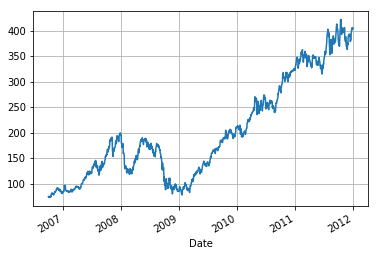

In [31]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

## Common Financila Analysis
In the rest of this section, I will explore returns, moving windows, volatility calculation and Ordinary Least-Squares Regression (OLS).

### Returns
The simple daily percentage doesn't take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading.

Note I am calculating te log returns to get a better insight into the growth of the returns over the timeperiod.

In [33]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily retuns 
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

In [34]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated. That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values in the beginning of the resulting DataFrame.

In [35]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 